# DL0101EN Final Assignment Project - Rodrigo César de Moraes Tavares

## Part A - Build a baseline model

**Instructions:** 
Use the Keras library to build a neural network with the following:

  - One hidden layer of 10 nodes, and a ReLU activation function

  - Use the adam optimizer and the mean squared error as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

In [1]:
# Import the libraries that will be used
import pandas as pd
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
# Download the data
concrete_data = pd.read_csv('https://cocl.us/concrete_data')
concrete_data.head()    

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# Check if data looks good
print(f'Data rows, columns: {concrete_data.shape}')
concrete_data.describe()

Data rows, columns: (1030, 9)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
# Split data into predictors (all columns except Strength) and target (Strength)
concrete_data_columns = concrete_data.columns
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [6]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [7]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [8]:
# Save the number of columns, that will be used for building the neural network
n_cols = predictors.shape[1] 

In [9]:
# Create the list of mean squared errors
mse_list = []
# Repeat 50 times the data split, model training and evaluation
for iteration in range(1,51):
    print(f'--------------------------- ITERATION #{iteration} -----------------------')
    
    # Randomly split the data into a training (70%) and test (30%) sets
    predictors_train, predictors_test, target_train, target_test = train_test_split( predictors, target, test_size=0.30, random_state=iteration)
    
    # Create the neural network model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,))) # Hidden layer with 10 neurons, Relu activation function and Input layer with n_cols neurons
    model.add(Dense(1)) # Output Layer with one neuron, as we are dealing with a regression model with one output

    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error') # compile the model, using the adam optimizer and mean_squared_error loss function
    
    # train and fit the model
    model.fit(predictors_train, target_train, epochs=50, verbose=1)    
    
    # Make predictions with the test set
    target_hat = model.predict(predictors_test)
    
    # Evaluate the prediction using the mean squared error metric
    mse = mean_squared_error( target_test, target_hat )
    print('Mean Squared Error:', mse)
    mse_list.append(mse)
    

--------------------------- ITERATION #1 -----------------------
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
721/721 [==============================] - 3s 4ms/step - loss: 432483.4649
Epoch 2/50
721/721 [==============================] - 0s 504us/step - loss: 220339.3625
Epoch 3/50
721/721 [==============================] - 0s 443us/step - loss: 101129.8157
Epoch 4/50
721/721 [==============================] - 0s 451us/step - loss: 43316.3004
Epoch 5/50
721/721 [==============================] - 0s 546us/step - loss: 19174.6700
Epoch 6/50
721/721 [==============================] - 0s 422us/step - loss: 10654.6969
Epoch 7/50
721/721 [==============================] - 0s 421us/step - loss: 7868.8074
Epoch 8/50
721/721 [==============================] - 0s 401us/step - loss: 7001.4816
Epoch 9/50
721/721 [==============================] - 0s 425us/step - loss: 6611.7569
Epoch 10/50
721/721 [=============

In [10]:
mse_list

[734.6538129599902,
 102.12457187317455,
 139.07480061421356,
 889.4970526654159,
 272.87307152276605,
 183.11528216383698,
 114.39675768668427,
 246.61206678230502,
 219.282229471933,
 83.29803414388915,
 102.45429947351131,
 360.3105676665359,
 1541.3790911631204,
 168.05574383491586,
 322.14711984451844,
 203.1123635168593,
 177.328484528558,
 94.25334880407837,
 2352.5422179282155,
 83.35851501442248,
 1835.1388997118001,
 226.25731501103684,
 218.47392015337246,
 1787.9615800769716,
 434.32447519417855,
 132.46640384097697,
 116.749413220842,
 379.1080279361855,
 125.69827060950814,
 712.2034773464476,
 123.88160677410306,
 368.35638807229554,
 802.6425822584482,
 381.7723257144752,
 118.10327535141673,
 198.5021589476047,
 113.73795973750047,
 177.35587964103968,
 220.89291378882587,
 114.7978072400405,
 715.6946215925769,
 678.4246084100212,
 96.23128270527248,
 196.59083561039859,
 1529.0240247642262,
 526.0369645542647,
 119.78159216040008,
 1652.9945195484852,
 165.5216072684

In [11]:
# Report the mean and the standard deviation of the mean squared errors
mean = np.mean(mse_list)
stdev = np.std(mse_list)
print('The mean of the mean squared errors is ', mean)
print('The standard deviation of the mean squared errors is', stdev)

The mean of the mean squared errors is  461.886513962273
The standard deviation of the mean squared errors is 537.6172754033378


In [12]:
import seaborn as sns

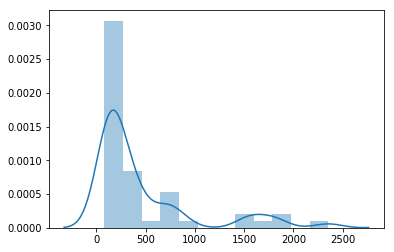

In [13]:
sns.distplot(mse_list)